In [1]:
import PoisDenoiser

import torch as th
import numpy as np
from time import time, sleep
from PoisDenoiser.utils import show_images as show, psnr
from PoisDenoiser.dataset_loader import BSDS500

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

torch.Size([1, 1, 481, 321])
189080_1_maxval=0dot1
psnr : -7.365


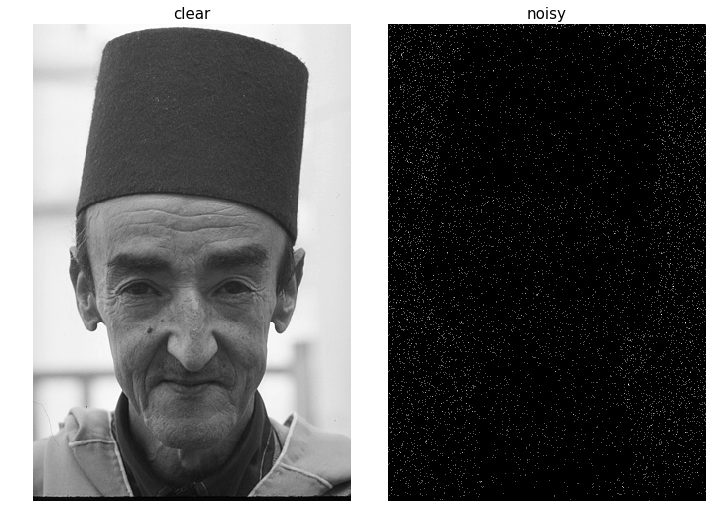

In [244]:
img_ind = 34
path2dataset = './DATASETS/BSDS500/BSDS500_validation_MAXVALs_01_2/'
BSDSval = BSDS500(path2dataset+'val/', get_name=True)
    
clear, noisy, name = BSDSval[img_ind]

clear.unsqueeze_(0), noisy.unsqueeze_(0);

print(clear.size())

# slice_ = (slice(0,1),
#           slice(0,1),
#           slice(0, 321),
#           slice(0, 321)) # slice for img_ind == 0

# slice_ = (slice(0,1),
#           slice(0,1),
#           slice(50, 200),
#           slice(150,300)) # slice for img_ind == 10

# # slice_ = (slice(0,1),
# #           slice(0,1),
# #           slice(0, 321),
# #           slice(0, 321)) # slice for img_ind == 22

# slice_ = (slice(0,1),
#           slice(0,1),
#           slice(160, 421),
#           slice(30, 290)) # slice for img_ind == 64

# slice_ = (slice(0,1),
#           slice(0,1),
#           slice(0, 421),
#           slice(0, 500)) 


# clear = clear[slice_].clone()
# noisy = noisy[slice_].clone()

print(name)
images = [clear, noisy]
titles = ['clear', 'noisy']

show(images, titles)
print('psnr : {:.3f}'.format(psnr(clear, noisy)))

In [245]:
from PoisDenoiser.utils import showimages4 as show4, psnr, do_inference_return_lists as run

saved_epoch = 600
maxval = 1.3
path2valdata = './DATASETS/BSDS500/BSDS500_validation_MAXVALs_01_2/'
clear_ind = 1
s, c = 4, 32
params_dict = {'s':s, 'c':c, 'saved_epoch':saved_epoch, \
               'path2valdata':path2valdata}

model_type = 'pois'
model_name = model_type+'_wo_prox_MSE_400/'
prox_param, sharing_weights = False, True


image_pois_wo_prox, title_pois_wo_prox = run(noisy, clear, model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
           prox_param=prox_param, maxval=maxval, **params_dict)

model_type = 'l2'
model_name = model_type+'_wo_prox_MSE_400/'
image_l2_wo_prox, title_l2_wo_prox = run(noisy, clear, model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
           prox_param=prox_param, maxval=maxval, **params_dict)

prox_param = True
model_type = 'pois'
model_name = model_type+'_w_prox_MSE_400/'

image_pois_w_prox, title_pois_w_prox = run(noisy, clear, model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
           prox_param=prox_param, maxval=maxval, **params_dict)

model_type = 'l2'
model_name = model_type+'_w_prox_MSE_400/'
image_l2_w_prox, title_l2_w_prox = run(noisy, clear, model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
           prox_param=prox_param, maxval=maxval, **params_dict)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


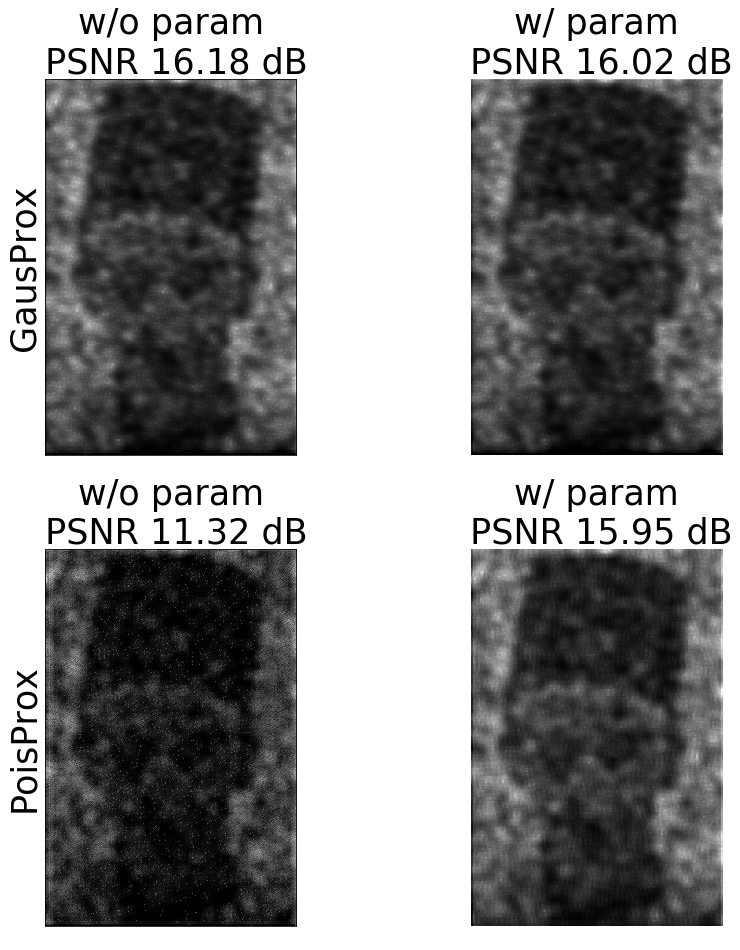

In [246]:
# compare 4 models simultaneously

from PoisDenoiser.utils import showimages4 as show4, psnr, showimages4horizontal as show4h, showimages4_lefttext as show_left
%load_ext autoreload
%autoreload 2

psnr_pois_w_prox = psnr(clear, image_pois_w_prox)
psnr_pois_wo_prox = psnr(clear, image_pois_wo_prox)
psnr_l2_w_prox = psnr(clear, image_l2_w_prox)
psnr_l2_wo_prox = psnr(clear, image_l2_wo_prox)

images = [image_l2_wo_prox, image_l2_w_prox, image_pois_wo_prox, image_pois_w_prox]
titles = ['GausProx w/o param\n PSNR {:.2f} dB'.format(psnr_l2_wo_prox),
          'GausProx w/ param\n PSNR {:.2f} dB'.format(psnr_l2_w_prox),
          'PoisProx w/o param\n PSNR {:.2f} dB'.format(psnr_pois_wo_prox),
          'PoisProx w/ param\n PSNR {:.2f} dB'.format(psnr_pois_w_prox),]

titles = ['w/o param\n PSNR {:.2f} dB'.format(psnr_l2_wo_prox),
          'w/ param\n PSNR {:.2f} dB'.format(psnr_l2_w_prox),
          'w/o param\n PSNR {:.2f} dB'.format(psnr_pois_wo_prox),
          'w/ param\n PSNR {:.2f} dB'.format(psnr_pois_w_prox),]

show_left(images, titles, fontsize=35)

# construct final image

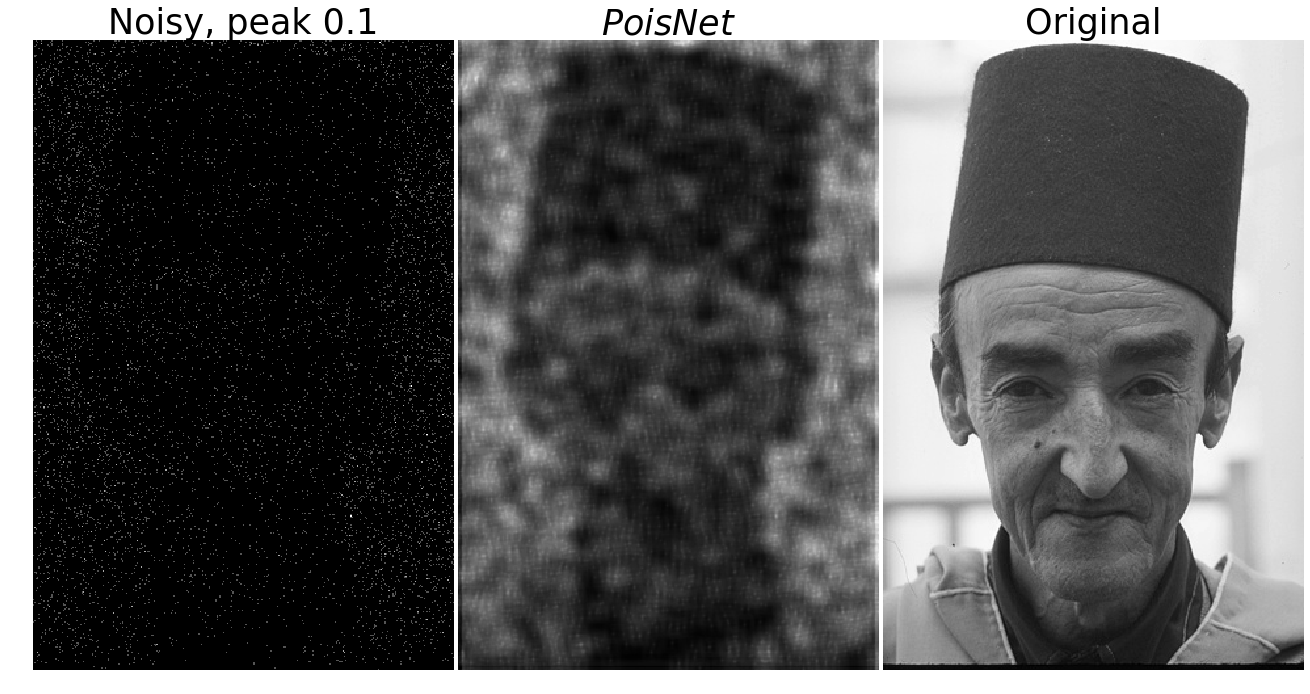

In [252]:
images = [noisy, image_pois_w_prox, clear]
titles = ['Noisy, peak 0.1', r'${PoisNet}$', 'Original']
fontsize = 35

##########

images_corrected_dims = []
for i, img in enumerate(images):
    if img.dim() == 4:
        img = img[0]

    img = img[0] if img.size()[0] == 1 else img.permute(1,2,0)
    images_corrected_dims.append(img)

images = images_corrected_dims
num_images = len(images)

figsize = (18,10)
fig, ax = plt.subplots(1, 3, figsize=figsize)
fig.patch.set_facecolor('white')

for i, img in enumerate(images):
    ax[i].imshow(img, cmap='gray')
    ax[i].set_axis_off()

# Now only titles have to be distributed.
if titles is not None:
    if isinstance(titles, list):
        for i, title in enumerate(titles):
            ax[i].set_title(title, fontsize=fontsize)

        if len(titles) < num_images:
            for i in range(len(titles), num_images):
                ax[i].set_title('', fontsize=fontsize)


fig.subplots_adjust(top=0.99, bottom=0.01, left=0.01, right=0.99, hspace=0.25,
                wspace=0.01)

# go through BSDS500 and look for PSNRs 

## pois_w_prox
## pois_wo_prox
## l2_w_prox
## l2_wo_prox

In [8]:
from glob import glob
import numpy as np
import torch as th
from imageio import imread
from PoisDenoiser.utils import show_images as show, do_inference_return_lists as run, psnr
from tqdm import tqdm
import matplotlib.pyplot as plt

In [9]:
# path2folder_gt = './../Denoising/Diploma/DATASETS/BSDS500/BSDS500_original/val/'
# list_of_paths = glob(path2folder_gt+'*.jpg')
# list_of_names = [name[len(path2folder_gt):-4] for name in list_of_paths]

# for maxval_int in range(1,21):
#     save_path = './DATASETS/BSDS500/4valtest/'+str(maxval_int)+'/'
#     for path, name in tqdm(zip(list_of_paths, list_of_names), desc='maxval == {}'.format(maxval_int)):
#         img = imread(path).astype(np.float32)/255
#         img = (img[...,0]+img[...,1]+img[...,2])/3
        
#         maxval = maxval_int/10
#         img = (th.FloatTensor(img)*maxval).unsqueeze(0)
#         noisy = th.distributions.Poisson(img).sample()
        
#         th.save(img, save_path+'gt/'+name+'.pth')
#         th.save(noisy, save_path+'noisy/'+name+'.pth')

In [16]:
models = ['l2', 'pois']
proxs = ['wo_prox', 'w_prox']
app = '_MSE_400/'

path2dataset = './DATASETS/BSDS500/4valtest/'
s, c = 4, 32
saved_epoch = 600
params_dict = {'s':s, 'c':c, 'saved_epoch':saved_epoch}

dict_of_psnrs = {}

for maxval_int in range(1,21):
    maxval = maxval_int / 10
    
    paths_clear = glob(path2dataset+str(maxval_int)+'/gt/*.pth')
    paths_noisy = glob(path2dataset+str(maxval_int)+'/noisy/*.pth')
    
    dict_of_psnrs[maxval] = {}
    for model_type in models:
        for prox_param in proxs:
            model_name = model_type + '_' + prox_param + app
            exp_name = model_name+'s{}c{}'.format(s,c)
            model_key = model_type+'_'+prox_param
            prox_param = True if prox_param == 'w_prox' else False  
            
            dict_of_psnrs[maxval][model_key] = []
            
            for path_clear, path_noisy in tqdm(zip(paths_clear, paths_noisy), desc='maxval == {}, model_key == {}'\
                                               .format(maxval, model_key)):

                clear = th.load(path_clear).unsqueeze(0)
                noisy = th.load(path_noisy).unsqueeze(0)
                
                image, title = run(noisy, clear, model_type=model_type, exp_name=exp_name, \
                           prox_param=prox_param, **params_dict)

                psnr_model = psnr(clear, image)

                dict_of_psnrs[maxval][model_key].append(psnr_model)

            np.save('./DATASETS/BSDS500/4valtest/dict_of_psnrs.npy', dict_of_psnrs)

maxval == 0.1, model_key == l2_wo_prox: 100it [01:17,  1.26it/s]
maxval == 0.1, model_key == l2_w_prox: 100it [01:17,  1.29it/s]
maxval == 0.1, model_key == pois_wo_prox: 100it [01:30,  1.10it/s]
maxval == 0.1, model_key == pois_w_prox: 100it [01:23,  1.21it/s]
maxval == 0.2, model_key == l2_wo_prox: 100it [01:18,  1.34it/s]
maxval == 0.2, model_key == l2_w_prox: 100it [01:14,  1.32it/s]
maxval == 0.2, model_key == pois_wo_prox: 100it [01:30,  1.10it/s]
maxval == 0.2, model_key == pois_w_prox: 100it [01:18,  1.29it/s]
maxval == 0.3, model_key == l2_wo_prox: 100it [01:13,  1.38it/s]
maxval == 0.3, model_key == l2_w_prox: 100it [01:13,  1.38it/s]
maxval == 0.3, model_key == pois_wo_prox: 100it [01:30,  1.11it/s]
maxval == 0.3, model_key == pois_w_prox: 100it [01:16,  1.32it/s]
maxval == 0.4, model_key == l2_wo_prox: 100it [01:13,  1.43it/s]
maxval == 0.4, model_key == l2_w_prox: 100it [01:14,  1.31it/s]
maxval == 0.4, model_key == pois_wo_prox: 100it [01:31,  1.11it/s]
maxval == 0.4, mod

In [20]:
dict_of_psnrs = np.load('./DATASETS/BSDS500/4valtest/dict_of_psnrs.npy').item()

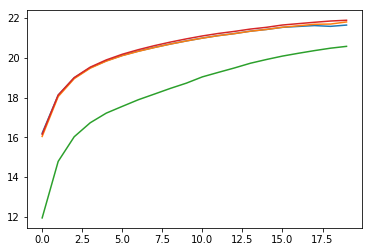

In [33]:
maxvals = list(dict_of_psnrs.keys())
models = ['l2_wo_prox', 'l2_w_prox', 'pois_wo_prox', 'pois_w_prox']
psnrs_dict = {}
for model in models:
    psnrs_dict[model] = []
    
for model in models:
    for maxval in maxvals:
        psnr_per_maxval = np.average(np.array(dict_of_psnrs[maxval][model]))
        psnrs_dict[model].append(psnr_per_maxval)
        
for model in models:
    plt.plot(psnrs_dict[model])
    

In [34]:
# arr = np.concatenate((np.array(psnrs_dict['maxvals']), np.array(psnrs_dict['img_inds']))).reshape(2,-1)
# indices_sorted = arr[0,:].argsort()

[-0.16 -0.14 -0.12 -0.1  -0.08 -0.06 -0.04 -0.02  0.    0.02]


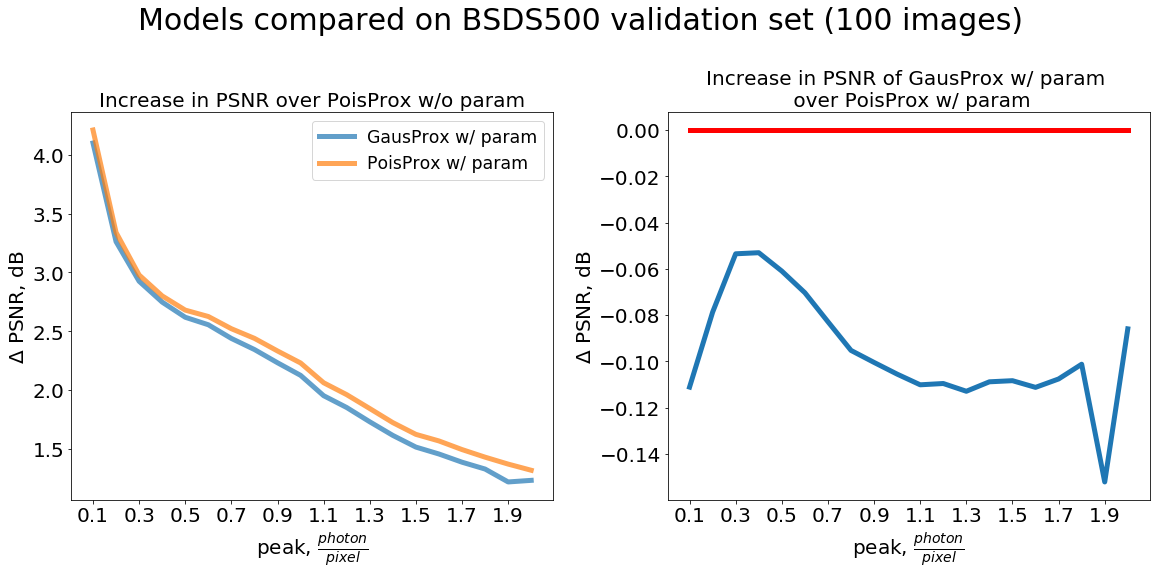

In [67]:
fontsize = 20
# illustration of how model quality wins at low light conditions from prox param!!!

base = np.array(psnrs_dict['pois_wo_prox'])
l2_w = np.array(psnrs_dict['l2_w_prox']) - base
pois_w = np.array(psnrs_dict['pois_w_prox']) - base


fig, ax = plt.subplots(1, 2, figsize=(16,8), constrained_layout=True)
fig.suptitle('Models compared on BSDS500 validation set (100 images)\n', fontsize=fontsize+10)

ax[0].plot(l2_w, label='GausProx w/ param', linewidth=5.0, alpha=0.7)
ax[0].plot(pois_w, label='PoisProx w/ param', linewidth=5.0, alpha=0.7)

ax[0].set_xticklabels(maxvals[::2])
ax[0].set_xticks(np.arange(20)[::2])

ax[0].set_xlabel(r'peak, $\frac{photon}{pixel}$', fontsize=fontsize)
ax[0].set_ylabel(r'$\Delta$ PSNR, dB', fontsize=fontsize)
ax[0].legend(fontsize='xx-large');
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);
ax[0].set_title('Increase in PSNR over PoisProx w/o param', fontsize=fontsize);
ax[0].tick_params(axis='both', labelsize=fontsize)

##########

gaus_over_pois = np.array(psnrs_dict['l2_w_prox']) - np.array(psnrs_dict['pois_w_prox'])

ax[1].plot(gaus_over_pois, linewidth=5.0)
ax[1].plot(np.arange(20), np.zeros(20), linewidth=5.0, c='red')

# y_ticks1 = ax[1].get_yticks()


ax[1].set_xticklabels(maxvals[::2])
ax[1].set_xticks(np.arange(20)[::2])

ax[1].set_xlabel(r'peak, $\frac{photon}{pixel}$', fontsize=fontsize)
ax[1].set_ylabel(r'$\Delta$ PSNR, dB', fontsize=fontsize)

ax[1].tick_params(axis='both', labelsize=fontsize)
ax[1].set_title('Increase in PSNR of GausProx w/ param \n over PoisProx w/ param', fontsize=fontsize);



# plt.tight_layout()

In [59]:
# fontsize = 20
# # illustration of how model quality wins at low light conditions from prox param!!!

# base = np.array(psnrs_dict['pois_wo_prox'])
# l2_w = np.array(psnrs_dict['l2_w_prox']) - base
# pois_w = np.array(psnrs_dict['pois_w_prox']) - base


# fig, ax = plt.subplots(1, 2, figsize=(16,8), constrained_layout=True)
# fig.suptitle('Models compared on BSDS500 validation set (100 images)\n', fontsize=fontsize+10)

# ax[0].plot(l2_w[indices_sorted], label='GausProx w/ param', linewidth=5.0, alpha=0.7)
# ax[0].plot(pois_w[indices_sorted], label='PoisProx w/ param', linewidth=5.0, alpha=0.7)

# ax[0].set_xticklabels(np.array(psnrs_dict['maxvals'])[indices_sorted][::10])
# ax[0].set_xticks(psnrs_dict['img_inds'][::10])

# ax[0].set_xlabel(r'peak, $\frac{photon}{pixel}$', fontsize=fontsize)
# ax[0].set_ylabel(r'$\Delta$ PSNR, dB', fontsize=fontsize)
# ax[0].legend(fontsize='xx-large');
# plt.xticks(fontsize=fontsize)
# plt.yticks(fontsize=fontsize);
# ax[0].set_title('Increase in PSNR over PoisProx w/o param', fontsize=fontsize);
# ax[0].tick_params(axis='both', labelsize=fontsize)

# ##########

# gaus_over_pois = np.array(psnrs_dict['l2_w_prox']) - np.array(psnrs_dict['pois_w_prox'])

# ax[1].plot(gaus_over_pois[indices_sorted], linewidth=5.0)
# ax[1].plot(np.arange(100), np.zeros(100), linewidth=5.0, c='red')


# ax[1].set_xticklabels(np.array(psnrs_dict['maxvals'])[indices_sorted][::10])
# ax[1].set_xticks(psnrs_dict['img_inds'][::10])

# ax[1].set_xlabel(r'peak, $\frac{photon}{pixel}$', fontsize=fontsize)
# ax[1].set_ylabel(r'$\Delta$ PSNR, dB', fontsize=fontsize)

# ax[1].tick_params(axis='both', labelsize=fontsize)
# ax[1].set_title('Increase in PSNR of GausProx w/ param \n over PoisProx w/ param', fontsize=fontsize);


# # plt.tight_layout()

NameError: name 'psnrs_dict' is not defined

In [ ]:
img_ind = 64

    
clear, noisy, name = BSDSval[img_ind]

clear.unsqueeze_(0), noisy.unsqueeze_(0);

print(name)
images = [clear, noisy]
titles = ['clear', 'noisy']

show(images, titles)
print('psnr : {:.3f}'.format(psnr(clear, noisy)))

In [12]:
# show horizontal

from PoisDenoiser.utils import showimages4 as show4, psnr, showimages4horizontal as show4h
%load_ext autoreload
%autoreload 2

psnr_noisy = psnr(clear, noisy)
psnr_pois = psnr(clear, image_pois)
psnr_l2 = psnr(clear, image_l2)
images = [noisy, clear, image_pois, image_l2]
titles = ['Noisy\n PSNR {:.2f} dB'.format(psnr_noisy),
          'Original',
     'PoisProx \n PSNR {:.2f} dB'.format(psnr_pois),
     'GausProx \n PSNR {:.2f} dB'.format(psnr_l2)]
titles =None

show4h(images, titles, maxval=maxval, fontsize=35)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'clear' is not defined

# compare with TRDPD

/home/davydov/miniconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/davydov/miniconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/davydov/miniconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/davydov/miniconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e,

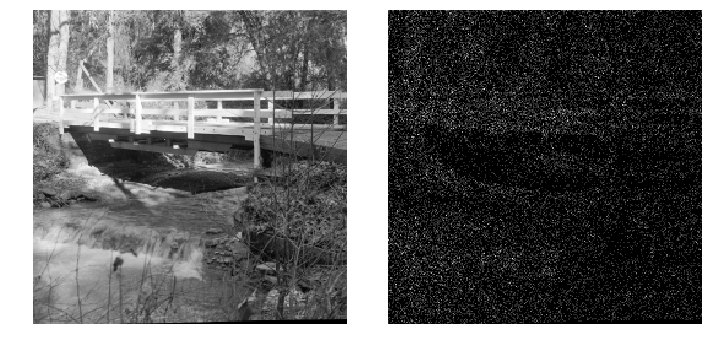

In [43]:
from imageio import imread
from PoisDenoiser.utils import get_poisson_pair_by_maxval
from skimage.transform import resize

# path = './../Denoising/Diploma/DATASETS/BSDS500/BSDS500_original/val/101085.jpg'
# maxval = 2

# path = './../Denoising/Diploma/DATASETS/BSDS500/BSDS500_original/val/3096.jpg'
# maxval = 1

path = './../Poisson_Denoiser/to_compare_with/bridge.tiff'
maxval = 1

gt = imread(path)
gt = resize(gt, (256,256))
gt = gt.astype(np.float32)*255

# gt = (gt[...,0] + gt[...,1] + gt[...,2])/3
gt[gt < 1] = 1
gt /= 255

gt, noisy = get_poisson_pair_by_maxval(gt, maxval)
gt.unsqueeze_(0).unsqueeze_(0)
noisy.unsqueeze_(0).unsqueeze_(0);

show([gt, noisy])

In [48]:
from PoisDenoiser.utils import showimages4 as show4, psnr, do_inference_return_lists as run

saved_epoch = 600
img_ind = 0
#maxval = 1
path2valdata = './DATASETS/BSDS500/BSDS500_validation_MAXVALs_01_2/'
clear_ind = 1
s, c = 5, 32
params_dict = {'s':s, 'c':c, 'saved_epoch':saved_epoch}

model_type = 'pois'
model_name = model_type+'_w_prox_1600_s5c32/'
prox_param, sharing_weights = True, True


img_pois_w_prox_noise20, title_pois_w_prox_noise20 = run(noisy, gt, model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
           prox_param=prox_param,  **params_dict)
print(title_pois_w_prox_noise20)

estim (epoch=600),
PSNR: 19.487 dB


In [49]:
from PoisDenoiser.utils import showimages4 as show4, psnr, do_inference_return_lists as run

saved_epoch = 1750
img_ind = 0
maxval = 1
path2valdata = './DATASETS/BSDS500/BSDS500_validation_PEAK_1/'
clear_ind = 1
s, c = 5, 32
params_dict = {'s':s, 'c':c, 'saved_epoch':saved_epoch}

model_type = 'pois'
model_name = 'peak1/'+model_type+'_w_prox_1600/'
prox_param, sharing_weights = True, True


img_pois_w_prox_noise1, title_pois_w_prox_noise1 = run(noisy, gt, model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
           prox_param=prox_param, **params_dict)
print(title_pois_w_prox_noise1)

estim (epoch=1750),
PSNR: 19.578 dB


/home/davydov/miniconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/davydov/miniconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


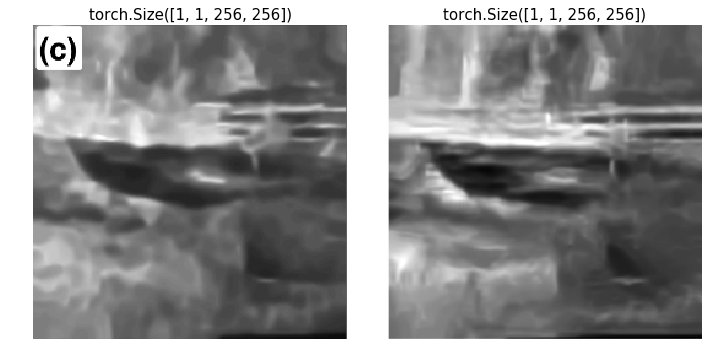

In [50]:
bridge_proxbm3d = resize(imread('./to_compare_with/bridge_proxBM3D.png')[...,0], (256,256))
bridge_proxbm3d, _ = get_poisson_pair_by_maxval(bridge_proxbm3d, 1)
bridge_proxbm3d.unsqueeze_(0).unsqueeze_(0);

bridge_iterbm3d = resize(imread('./to_compare_with/bridge_iterBM3D.png')[...,0], (256,256))
bridge_iterbm3d, _ = get_poisson_pair_by_maxval(bridge_iterbm3d, 1)
bridge_iterbm3d.unsqueeze_(0).unsqueeze_(0);


show([bridge_proxbm3d, bridge_iterbm3d], [str(bridge_proxbm3d.shape), str(bridge_iterbm3d.shape)])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


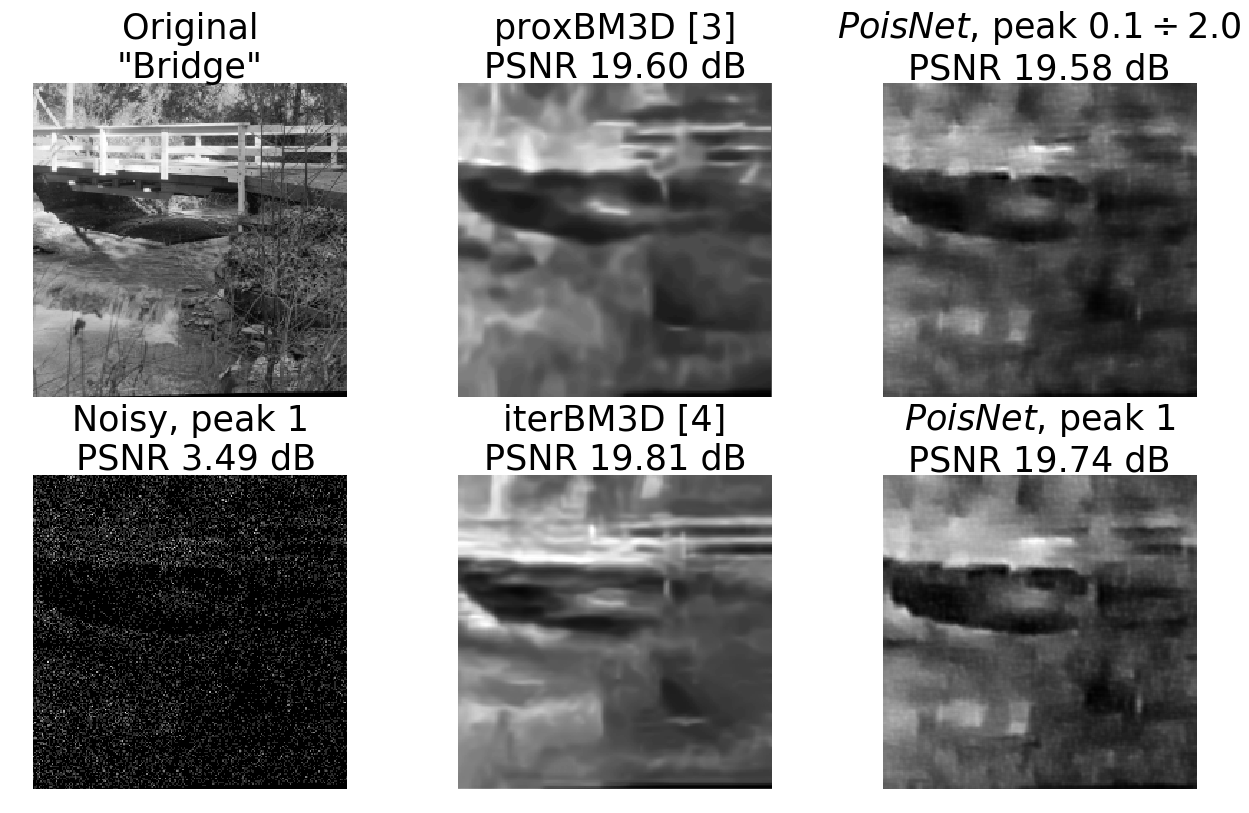

In [58]:
from PoisDenoiser.utils import showimages4horizontal as show4h
%load_ext autoreload
%autoreload 2

psnr_noisy = psnr(gt, noisy)
psnr_pois_noise1 = 19.74 #psnr(gt, img_pois_w_prox_noise1)
psnr_pois_noise20 = 19.58 #psnr(gt, img_pois_w_prox_noise20)

psnr_proxbm3d = 19.60
psnr_iterbm3d = 19.81


crop = 37
images = [gt[...,crop:, crop:], 
          bridge_proxbm3d[...,crop:, crop:], 
          img_pois_w_prox_noise20[...,crop:,crop:],
          noisy[...,crop:, crop:], 
          bridge_iterbm3d[...,crop:, crop:], 
          img_pois_w_prox_noise1[...,crop:,crop:]]
titles = ['Original\n"Bridge"',
          'proxBM3D [3]\nPSNR {:.2f} dB'.format(psnr_proxbm3d),
          r'$PoisNet$'+', peak $0.1\div 2.0$\nPSNR {:.2f} dB'.format(psnr_pois_noise20),
          'Noisy, peak 1\n PSNR {:.2f} dB'.format(psnr_noisy),
          'iterBM3D [4]\nPSNR {:.2f} dB'.format(psnr_iterbm3d),
          r'$PoisNet$'+', peak 1\nPSNR {:.2f} dB'.format(psnr_pois_noise1)]
         
         
# titles =None

# show4h(images, titles, fontsize=35)


from PoisDenoiser.utils import showimages_trdpd as show6
show6(images, titles, fontsize=35)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


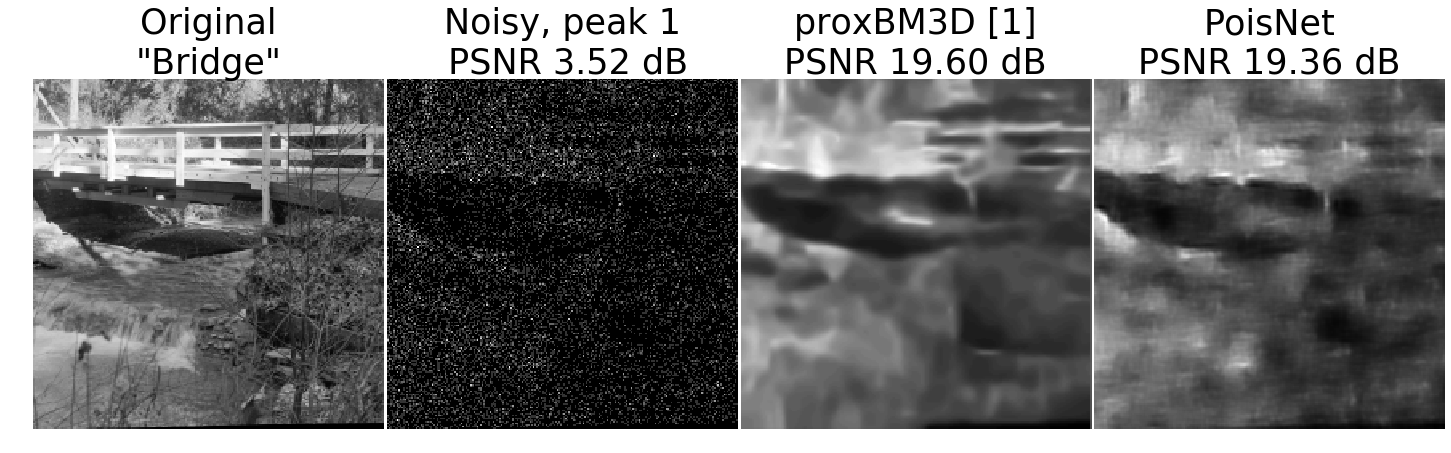

In [39]:
from PoisDenoiser.utils import showimages4horizontal as show4h
%load_ext autoreload
%autoreload 2

psnr_noisy = psnr(gt, noisy)
psnr_pois_noise1 = psnr(gt, img_pois_w_prox_noise1)
psnr_pois_noise20 = psnr(gt, img_pois_w_prox_noise20)

psnr_proxbm3d = 19.60
psnr_iterbm3d = 19.81


crop = 37
images = [gt[...,crop:, crop:], 
          noisy[...,crop:, crop:], 
          bridge_proxbm3d[...,crop:, crop:], 
          image[...,crop:, crop:]]
titles = ['Original\n"Bridge"',
          'Noisy, peak 1\n PSNR {:.2f} dB'.format(psnr_noisy),
         'proxBM3D [1]\nPSNR {:.2f} dB'.format(psnr_proxbm3d),
         'PoisNet\nPSNR {:.2f} dB'.format(psnr_pois)]
# titles =None

show4h(images, titles, fontsize=35)

# Compute time for denoising inference

In [2]:
from time import time

from PoisDenoiser.dataset_loader import FMD
from PoisDenoiser.utils import do_inference_return_lists
from PoisDenoiser.networks.PoisNet.net import PoisNet
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 100/100 [01:09<00:00,  1.22it/s]


0.6904991292953491


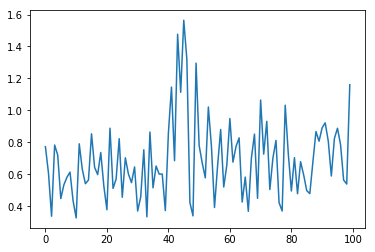

In [3]:
saved_epoch = 200
s, c = 5, 32
prox_param = True
exp_name = 'fmd/pois_w_prox_900/s5c32/'

path2data = './DATASETS/FMD/fmd/'
fmd = FMD(path_to_datafolder=path2data, exp='confocal', trainorval='val', get_name=False)
img_ind = 0
gt, noisy = fmd[img_ind]
gt.unsqueeze_(0)
noisy.unsqueeze_(0)

model = PoisNet(output_features=c, stages=s, prox_param=prox_param, convWeightSharing=True)

state = th.load('./PoisDenoiser/networks/PoisNet/models/'\
    +exp_name+'/state_{}.pth'.format(saved_epoch),\
               map_location=lambda storage,loc:storage)

model.load_state_dict(state['model_state_dict'])

times = []
for t in tqdm(range(100)):
    start = time()
    estim = model(noisy.contiguous(), noisy.contiguous()).detach()
    times.append(time()-start)

plt.plot(times)
print(np.average(np.array(times)))

# show([estim, gt, noisy], ['estim', 'gt', 'noisy'])

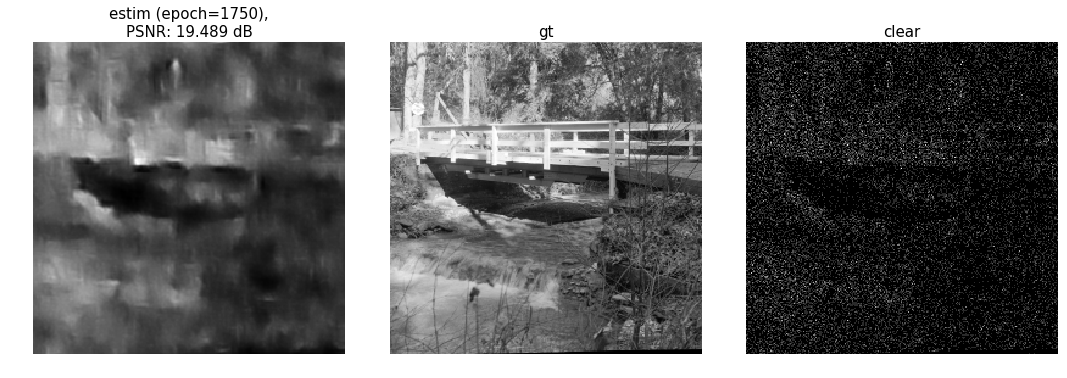

In [27]:
from PoisDenoiser.utils import showimages4 as show4, psnr, do_inference_return_lists as run

saved_epoch = 1750
img_ind = 0
maxval = 1
path2valdata = './DATASETS/BSDS500/BSDS500_validation_PEAK_1/'
clear_ind = 1
s, c = 5, 32
params_dict = {'s':s, 'c':c, 'saved_epoch':saved_epoch, \
               'path2valdata':path2valdata}

model_type = 'pois'
model_name = model_type+'_w_prox_1600_s5c32/'
prox_param, sharing_weights = True, True


image, title = run(noisy, gt, model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
           prox_param=prox_param, maxval=maxval, **params_dict)

show([image, gt, noisy], [title, 'gt', 'clear'])

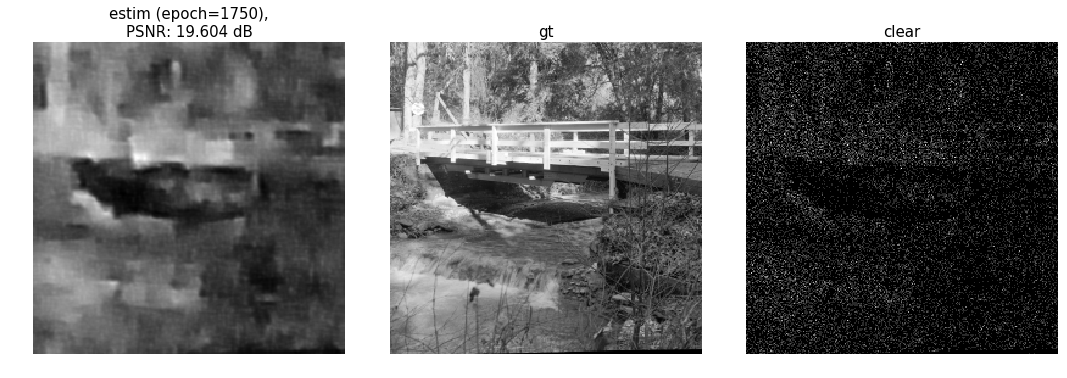

In [26]:
show([image, gt, noisy], [title, 'gt', 'clear'])

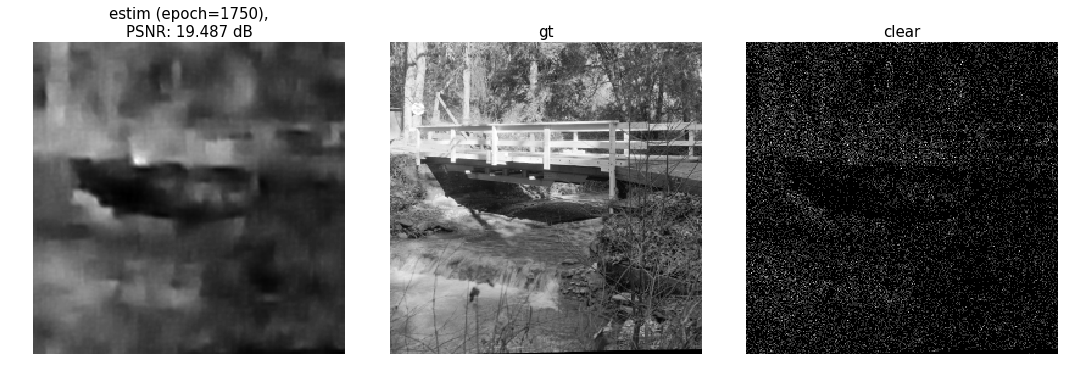

# really compare with trdpd

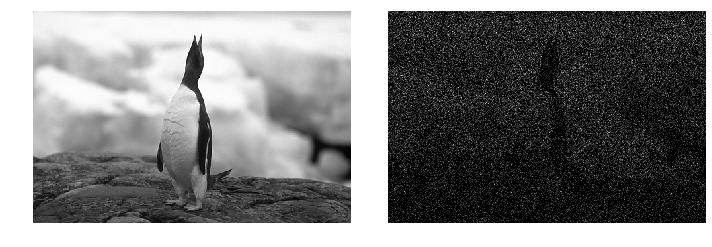

In [21]:
from PoisDenoiser.utils import get_poisson_pair_by_maxval
from PoisDenoiser.utils import show_images as show, do_inference as show_model

path2dataset = './DATASETS/BSDS500/BSDS500_validation_PEAK_1/'
BSDSval = BSDS500(path2dataset+'val/', get_name=True)
img_ind = 5
gt, noisy, name = BSDSval[img_ind]
gt.unsqueeze_(0), noisy.unsqueeze_(0);


maxval = 1

gt, noisy = get_poisson_pair_by_maxval(gt, maxval)
show([gt, noisy])

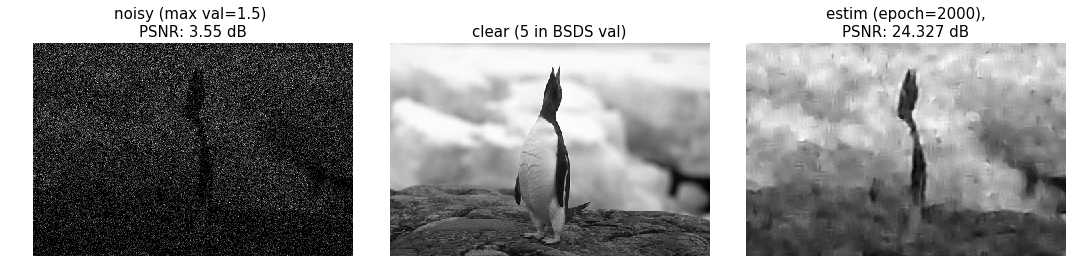

In [34]:
saved_epoch = 2000
img_ind = 5

path2valdata = './DATASETS/BSDS500/BSDS500_validation_MAXVALs_01_2/'
# path2valdata = './DATASETS/BSDS500/BSDS500_validation_PEAK_1/'
clear_ind = 1
s, c = 5, 32
params_dict = {'s':s, 'c':c, 'img_ind':img_ind, 'saved_epoch':saved_epoch, \
               'path2valdata':path2valdata, 'clear_ind':clear_ind}

model_type = 'pois'
model_name = model_type+'_w_prox_1600_s5c32/' #'_w_prox_MSE_400/' 
prox_param = True
x = show_model(model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
           prox_param=prox_param, **params_dict)

In [23]:
# from PoisDenoiser.utils import do_inference as show_model

# saved_epoch = 1750
# img_ind = 5

# path2valdata = './DATASETS/BSDS500/BSDS500_validation_MAXVALs_01_2/'
# path2valdata = './DATASETS/BSDS500/BSDS500_validation_PEAK_1/'

# clear_ind = 1
# s, c = 4, 32
# params_dict = {'s':s, 'c':c, 'img_ind':img_ind, 'saved_epoch':saved_epoch, \
#                'path2valdata':path2valdata, 'clear_ind':clear_ind}

# s, c = 4, 32
# model_type = 'pois'
# model_name = 'peak1/'+model_type+'_w_prox_400/'
# prox_param = True
# x = show_model(model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
#            prox_param=prox_param, **params_dict)

In [32]:
from imageio import imread
from skimage.transform import resize

nlspca = imread('./to_compare_with/trdpd/NLSPCA.png')[...,0]
nlspca = resize(nlspca, (321,481))
nlspca, _ = get_poisson_pair_by_maxval(nlspca, 1)
nlspca.unsqueeze_(0).unsqueeze_(0)

trdpd = imread('./to_compare_with/trdpd/trdpd8_7x7.png')[...,0]
trdpd = resize(trdpd, (321,481))
trdpd, _ = get_poisson_pair_by_maxval(trdpd, 1)
trdpd.unsqueeze_(0).unsqueeze_(0)

bm3dbin = imread('./to_compare_with/trdpd/bm3dbin.png')[...,0]
bm3dbin = resize(bm3dbin, (321,481))
bm3dbin, _ = get_poisson_pair_by_maxval(bm3dbin, 1)
bm3dbin.unsqueeze_(0).unsqueeze_(0);

/home/davydov/miniconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/davydov/miniconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [39]:
from PoisDenoiser.utils import showimages4 as show4, psnr, do_inference_return_lists as run
%load_ext autoreload
%autoreload 2

saved_epoch = 2000
img_ind = 5
maxval = 1
path2valdata = './DATASETS/BSDS500/BSDS500_validation_MAXVALs_01_2/'
clear_ind = 1
s, c = 5, 32
params_dict = {'s':s, 'c':c, 'saved_epoch':saved_epoch, \
               'path2valdata':path2valdata}

model_type = 'pois'
model_name = model_type+'_w_prox_1600_s5c32/'
prox_param, sharing_weights = True, True


image, title = run(noisy, gt, model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
           prox_param=prox_param, s=5, c=32, saved_epoch =saved_epoch)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


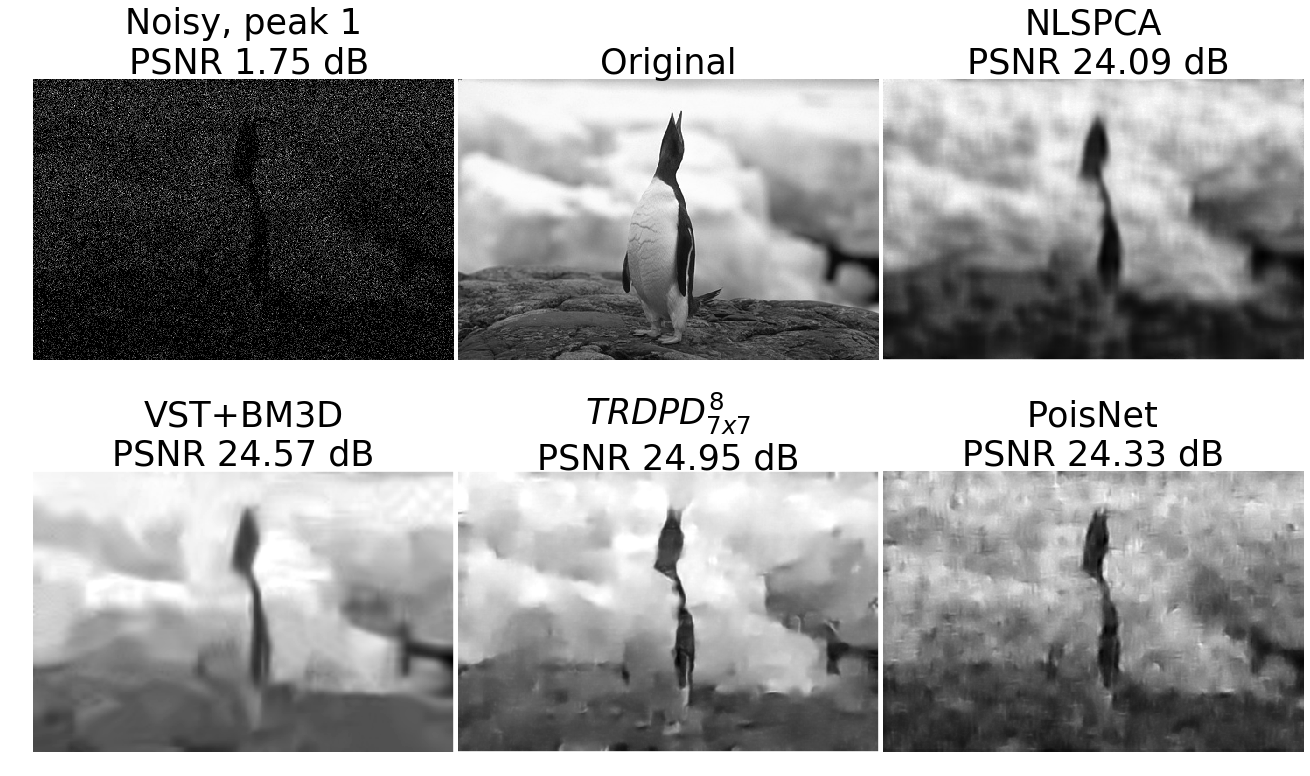

In [41]:
images = [noisy, gt, nlspca,
         bm3dbin, trdpd, image]

psnr_noisy = psnr(gt, noisy)
psnr_pois = 24.33#psnr(gt, image)

titles = ['Noisy, peak 1\n PSNR {:.2f} dB'.format(psnr_noisy),
          'Original',
          'NLSPCA\n PSNR 24.09 dB',
          'VST+BM3D\nPSNR 24.57 dB',
          r'$TRDPD^8_{7x7}$'+'\nPSNR 24.95 dB',
          'PoisNet\nPSNR {:.2f} dB'.format(psnr_pois)]

fontsize = 35

from PoisDenoiser.utils import showimages_trdpd as show6
show6(images, titles, fontsize=fontsize)

In [ ]:
from PoisDenoiser.utils import showimages4 as show4, psnr
%load_ext autoreload
%autoreload 2

psnr_noisy = psnr(clear, noisy)
psnr_pois = psnr(clear, img_estim_pois)
psnr_noprox = psnr(clear, img_estim_noprox)
show4([noisy, img_estim_pois, clear, img_estim_noprox],
     ['Noisy, peak 1.5\n PSNR {:.2f} dB'.format(psnr_noisy),
     'Proximal GD, \n PSNR {:.2f} dB'.format(psnr_pois),
      'Clear',
     'Ordinary GD \n PSNR {:.2f} dB'.format(psnr_noprox)])

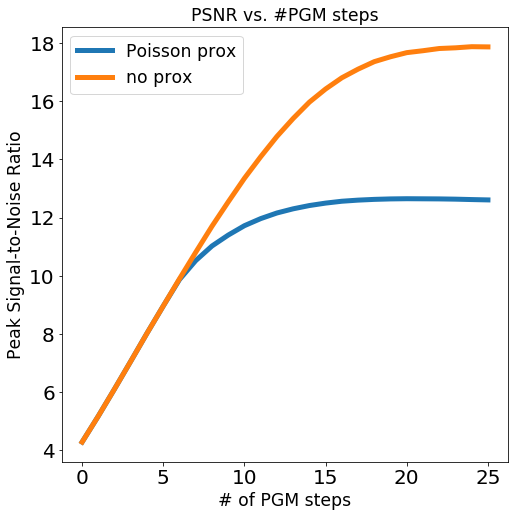

In [119]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(psnrs_pois, label='Poisson prox', linewidth=5.0)
ax.plot(psnrs_noprox, label='no prox', linewidth=5.0)
plt.xlabel('# of PGM steps', fontsize='xx-large')
plt.ylabel('Peak Signal-to-Noise Ratio', fontsize='xx-large')
plt.legend(fontsize = 'xx-large')
ax.set_title('PSNR vs. #PGM steps', fontsize='xx-large');
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);